# Bank data analysis

The goal of your project is to create a robust classifier and use the data, where you will build a model that will recognize whether specific client will leave/unsubscribe the bank services.
Make feature engineering but also try differnet models in order to get as much accuracy as possible.




    

## Dataset Info

* CLIENTNUM
  - Client number. Unique identifier for the customer holding the account

* Attrition_Flag
  - Internal event (customer activity) variable - if the account is closed then 1 else 0

* Customer_Age
  - Demographic variable - Customer's Age in Years

* Gender
  - Demographic variable - M=Male, F=Female

* Dependent_count
  - Demographic variable - Number of dependents

* Education_Level
  - Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)


* Marital_Status
  - Demographic variable - Married, Single, Divorced, Unknown

* Income_Category
  - Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)


* Card_Category
  - Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

* Months_on_book
  - Period of relationship with bank


* Total_Relationship_Count
  - Total no. of products held by the customer

* Months_Inactive_12_mon
  - No. of months inactive in the last 12 months

* Contacts_Count_12_mon
  - No. of Contacts in the last 12 months

* Credit_Limit
  - Credit Limit on the Credit Card

* Total_Revolving_Bal
  - Total Revolving Balance on the Credit Card

* Avg_Open_To_Buy
  - Open to Buy Credit Line (Average of last 12 months)

* Total_Amt_Chng_Q4_Q1
  - Change in Transaction Amount (Q4 over Q1)

* Total_Trans_Amt
  - Total Transaction Amount (Last 12 months)

* Total_Trans_Ct
  - Total Transaction Count (Last 12 months)

* Total_Ct_Chng_Q4_Q1
  - Change in Transaction Count (Q4 over Q1)

* Avg_Utilization_Ratio
  - Average Card Utilization Ratio




# Working Plan



1. Phase 1 : Dataset
    * Team Planning
    * Full git project Integration
    * General Project Research
    * Dataset Preparation
    * Dataset Feature Engineering

2. Phase 2 : Training
    * Make Research about your model
    * Compose your model (try different models) 
    * Ping Pong phase with Dataset feature engineers
    * Generate more data if needed
    * Fine tunning of your model

3. Phase 3 : Deployment
    * Perform benchmark (precision/recall), ROC curve
    * Model Deploy (Git)
    * Write git Readme.md file
    * Receive Feedback from PM

## 0. Read data, visualize, basic statistics, understand it

* Import relevant libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


* load the dataset load

In [6]:
path = 'dataset_bank.csv'
dataset = pd.read_csv(path)
pd.set_option('display.max_columns', None)

* Explore the dataset

In [7]:
dataset

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,3.900000e+01,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,4.400000e+01,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,3.600000e+01,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3.400000e+01,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,2.100000e+01,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,4.000000e+01,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,2.500000e+01,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,3.600000e+01,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,2.147484e+09,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  float64
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* Check for null values

In [9]:

dataset.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

* Descriptive statistics

In [10]:

dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,3.742297e+07,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,3.193385e+09,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,-2.147484e+09,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,3.100000e+01,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,3.600000e+01,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,4.000000e+01,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,3.210000e+11,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [11]:
# count numerial and categorical colums

cat_col = [x for x in dataset.columns if dataset[x].dtype == 'O']
num_col = [x for x in dataset.columns if x not in cat_col]

print('cat_col : {} \n\
num_col : {}'.format(len(cat_col), len(num_col)))

cat_col : 6 
num_col : 15


* Exploring the target values

Our target value - whenter our client has attrited or not attrited. We can observe that our target variable is imbalanced - about 84% of the data belongs to the class Existing customers, and only 16% of the clients are churned.


In [12]:
dataset['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

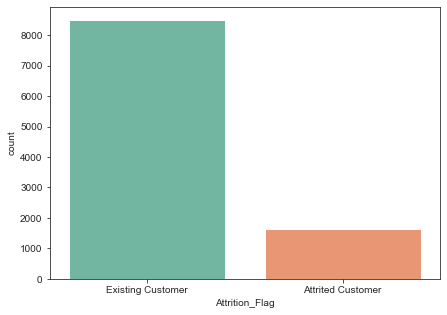

In [13]:
Attrition_Flag = dataset.iloc[:,0:1]
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
plt.figure(figsize=(7, 5))
sns.countplot(x="Attrition_Flag", data=dataset, palette='Set2');

## 1. Data preprocessing, normalization, missing data, categorical data

### 1.1 plotting histograms for the categorical data to provide visual summary of the data

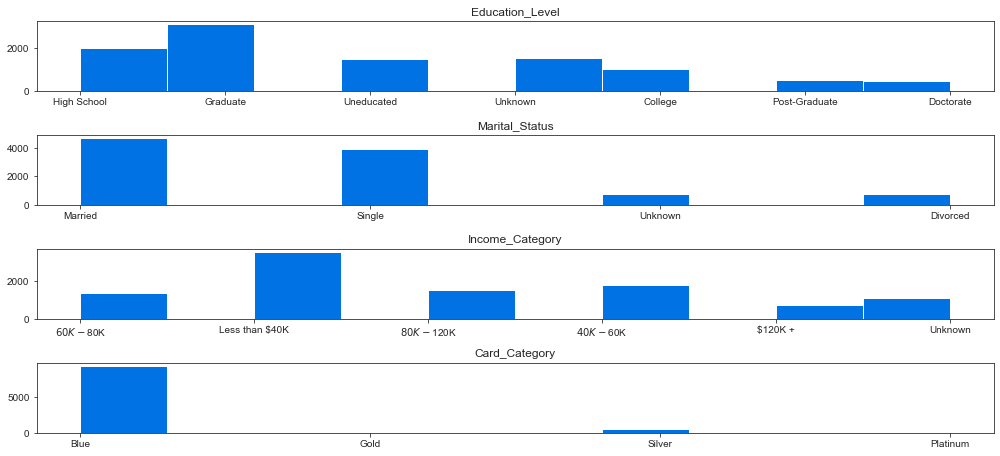

In [27]:
categories = ['Education_Level',
              'Marital_Status',
              'Income_Category',
              'Card_Category']

fig, ax = plt.subplots(4, figsize=(14, 7))

i = 0
for cat in categories:
    ax[i].hist(dataset[cat],color = '#0072E3')
    ax[i].set_title(cat)
    i += 1
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### 1.2 plotting  histograms of numerical columns to provide visual summary of the data

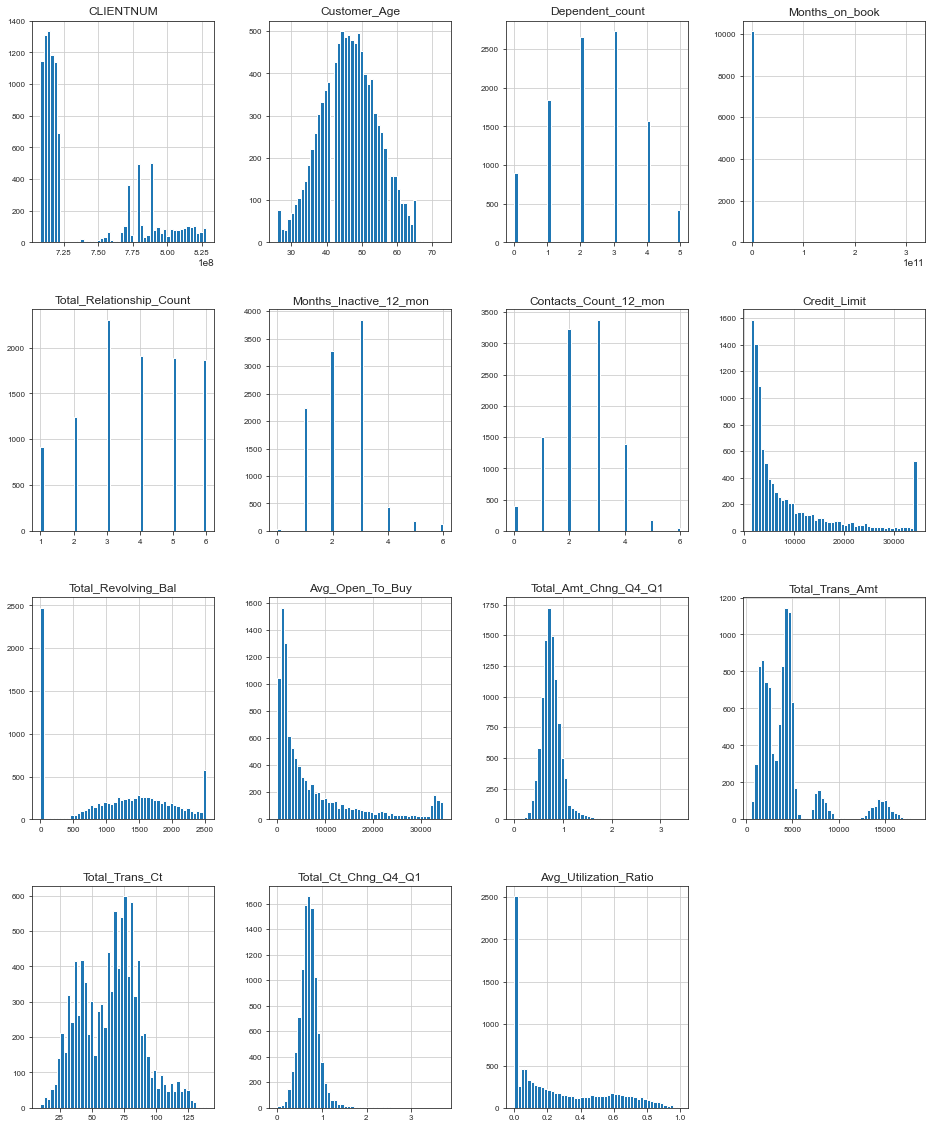

In [17]:
dataset_num = dataset.select_dtypes(include = ['float64', 'int64'])
dataset_num.head()
dataset_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

### 1.3 plotting boxplots to provide visual summary of the data

CLIENTNUM                       AxesSubplot(0.125,0.71587;0.133621x0.16413)
Customer_Age                 AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Dependent_count               AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Months_on_book               AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Total_Relationship_Count     AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Months_Inactive_12_mon         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Contacts_Count_12_mon       AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Credit_Limit                 AxesSubplot(0.44569,0.518913;0.133621x0.16413)
Total_Revolving_Bal         AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Avg_Open_To_Buy             AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Total_Amt_Chng_Q4_Q1           AxesSubplot(0.125,0.321957;0.133621x0.16413)
Total_Trans_Amt             AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Total_Trans_Ct               AxesSubplot(0.44569,0.321957;0.133621x0.16413)
Total_Ct_Chn

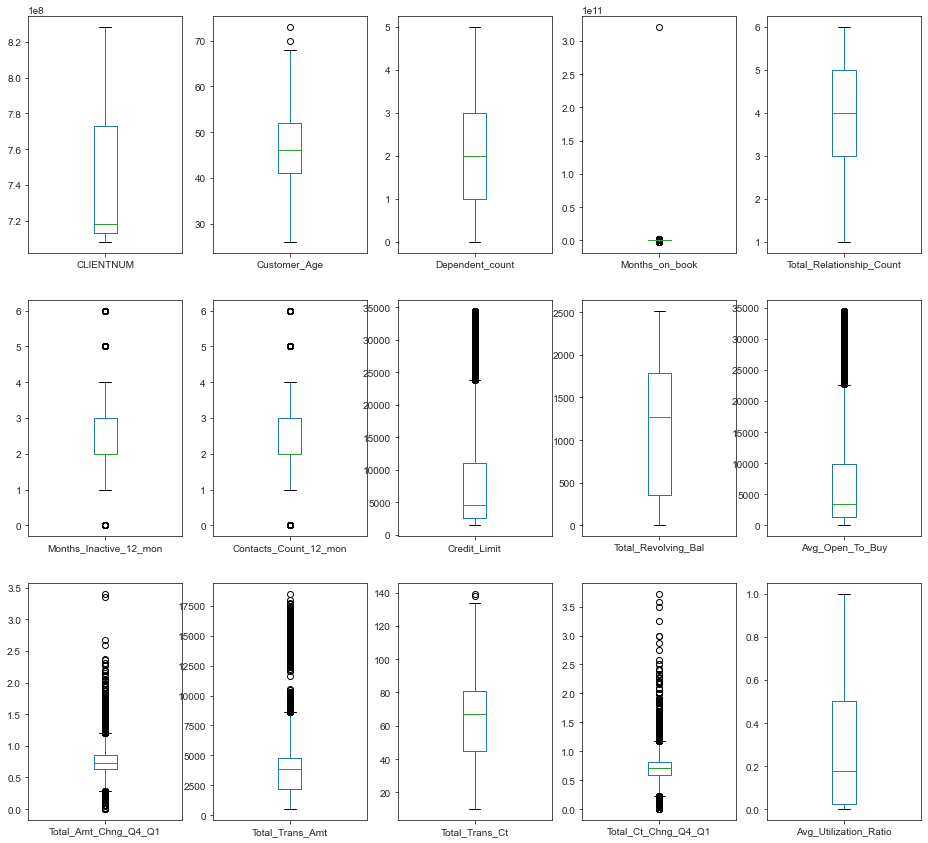

In [18]:
dataset_num.plot(figsize=(16, 20), kind='box', subplots=True, layout=(4, 5))

### Plotting a heat map

* We are encoding the target variable so that we will see how is it correlated to the other colums 
From the results in the heatmap we can see that the **Attrition_Flag** is negatively correlated to the  **Months_Inactive_12_mon** indicating that users that were not using the services of the bank in the last year are more likely to churn  and the **Contacts_Count_12_mon** indicating that the customers maybe has some problems that could not be solved by the bank support.
The  **Avg_Utilization_Ratio**, **Total_Ct_Chng_Q4_Q1**,**Total_Trans_Ct**,**Total_Trans_Amt**, **Total_Amt_Chng_Q4_Q1**,**Total_Revolving_Bal** colums are positivly correlated, indicated that the customers that are regularly using the bank services 

In [20]:
from sklearn.preprocessing import LabelEncoder     

labelencoder = LabelEncoder()
# Categorical encoding
dataset['Attrition_Flag'] = labelencoder.fit_transform(dataset['Attrition_Flag'])

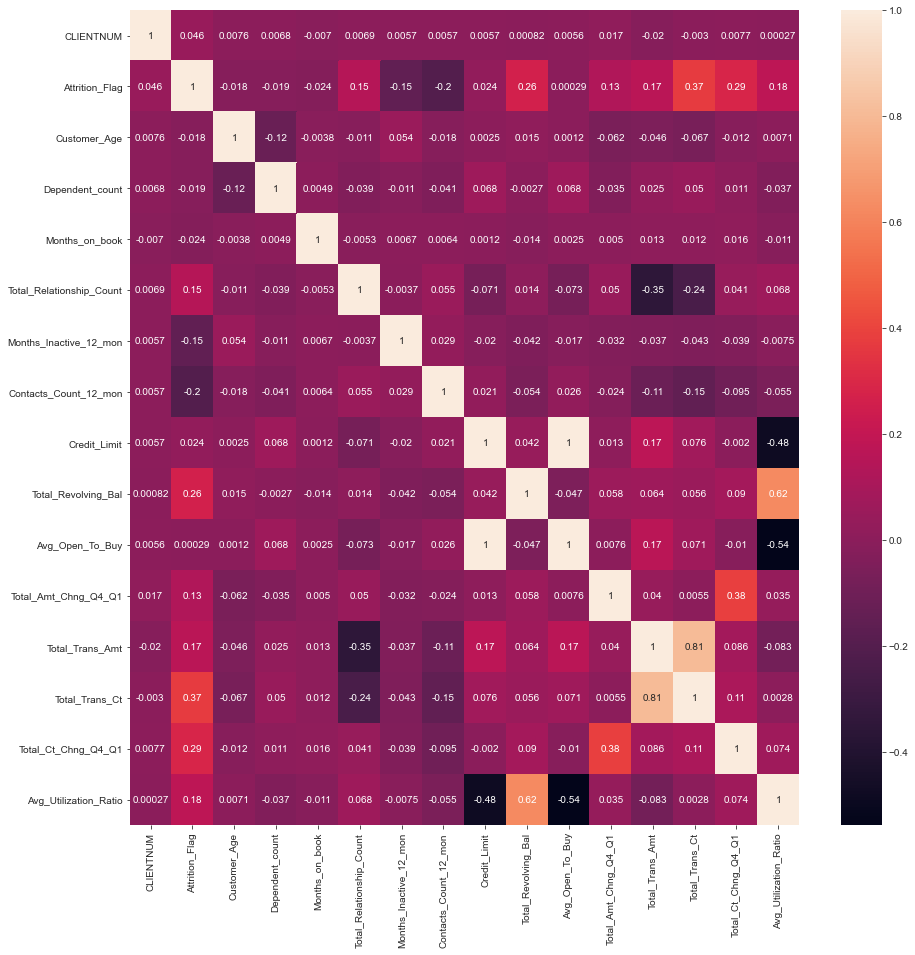

In [21]:
 plt.figure(figsize=(15,15))
 sns.heatmap(dataset.corr(),annot=True);